# Complexity - neural networks

In [5]:
import sklearn.datasets

digits = sklearn.datasets.load_digits(n_class=4)['images']
bw_digits = (digits >= 8)
data = bw_digits[:4, 1:, 2:7].astype(int)
data.shape
# data = bw_digits[:4, :, :].astype(int)

(4, 7, 5)

In [6]:
D=np.array([[1,1,1,1,0],
             [0,1,0,0,1],
             [0,1,0,0,1],
             [0,1,0,0,1],
             [0,1,0,0,1],
             [0,1,0,0,1],
             [0,1,1,1,0]])
J=np.array([[1,1,1,1,1],
             [0,0,0,1,0],
             [0,0,0,1,0],
             [0,0,0,1,0],
             [0,0,0,1,0],
             [1,0,0,1,0],
             [1,1,1,0,0]])
C=np.array([[0,1,1,1,1],
             [1,0,0,0,0],
             [1,0,0,0,0],
             [1,0,0,0,0],
             [1,0,0,0,0],
             [1,0,0,0,0],
             [0,1,1,1,1]])
M=np.array([[1,0,0,0,1],
             [1,1,0,1,1],
             [1,0,1,0,1],
             [1,0,0,0,1],
             [1,0,0,0,1],
             [1,0,0,0,1],
             [1,0,0,0,1]])
data = np.stack((D, J, C, M))
data.shape

(4, 7, 5)

(4, 7, 5)

35

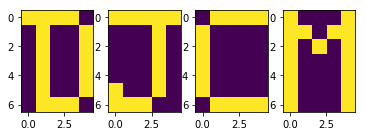

In [7]:
import matplotlib.pyplot as plt
def plot_all_data():
    fig, axes = plt.subplots(1, len(data))
    for ax, image in zip(axes, data):
        ax.imshow(image)
plot_all_data()
display(data.shape, data[0].size)

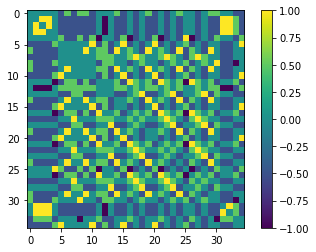

In [8]:
shape = data.shape[1:]
shape

W_list = []
for D in data:
    x = D.flatten() * 2 - 1
    Wn = np.outer(x, x)
    W_list.append(Wn)
W = np.dstack(W_list).sum(axis=-1) / data.shape[0] - np.eye(data[0].size)
plt.imshow(W)
plt.colorbar()

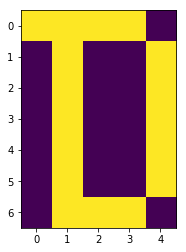

In [9]:
plt.imshow(data[0])

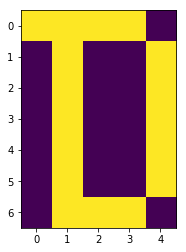

In [10]:
plt.imshow(data[0])

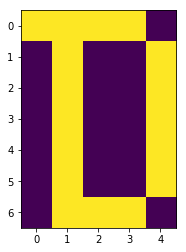

In [11]:
def act(W, image):
    x = image.flatten() * 2 - 1
    result = np.sign(W @ x).astype(int)
    result_rescaled = (result.reshape(image.shape) + 1) // 2
    return result_rescaled
plt.imshow(act(W, data[0]))

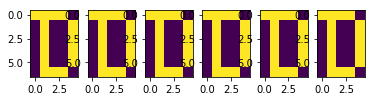

Equality: True


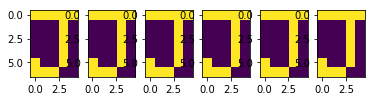

Equality: True


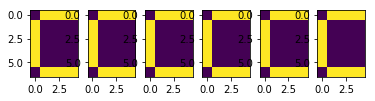

Equality: True


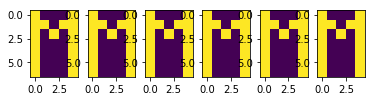

Equality: True


In [13]:
steps = 5
for D in data:
    D_working = D.copy()
    fig, axes = plt.subplots(1, 1+steps)
    axes[0].imshow(D)
    for n in range(steps):
        D_working = act(W, D_working)
        axes[1+n].imshow(D_working)
    plt.show()
    print(f"Equality: {(D_working == D).all()}")

In [14]:
def recognize(D_working, data):
    product = np.prod(D_working == data, axis=(1, 2))
    if (product == 0).all():
        product = np.prod((1-D_working) == data, axis=(1, 2))
    return data[np.argmax(product)]

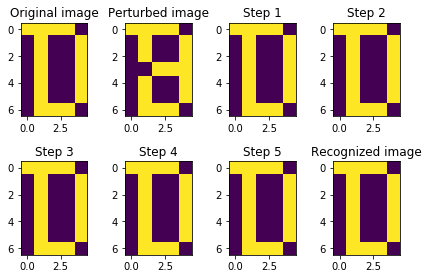

Equality: True
Recognized: True


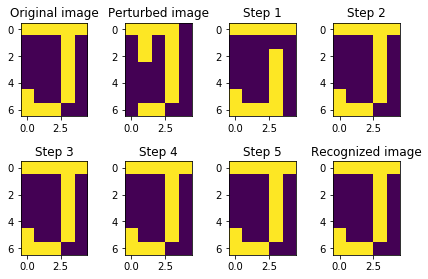

Equality: True
Recognized: True


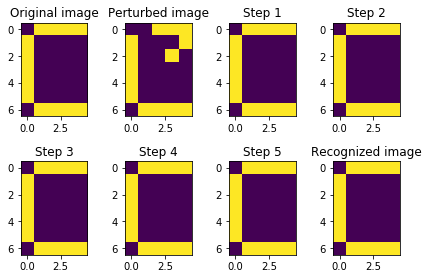

Equality: True
Recognized: True


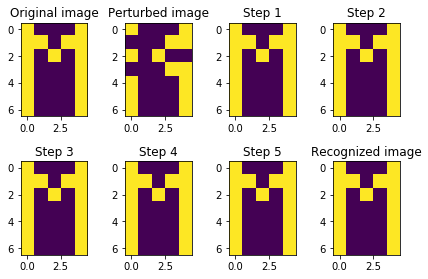

Equality: True
Recognized: True


In [15]:
def run_perturbations(n_flipped, seed=0):
    np.random.seed(seed)
    for D in data:
        D_working = D.copy()
        for _ in range(n_flipped):
            x = np.random.randint(0, D_working.shape[0])
            y = np.random.randint(0, D_working.shape[1])
            D_working[x, y] = 1 - D_working[x, y]

        fig, axes = plt.subplots(2, (3+steps)//2)
        assert steps % 2 == 1
        axes = axes.flatten()
        axes[0].imshow(D)
        axes[0].set_title("Original image")
        axes[1].imshow(D_working)
        axes[1].set_title("Perturbed image")
        for n in range(steps):
            D_working = act(W, D_working)
            axes[2+n].imshow(D_working)
            axes[2+n].set_title(f"Step {n+1}")
#         recognized =  data[np.argmax(np.prod(D_working == data, axis=(1, 2)))]
        recognized = recognize(D_working, data)
        axes[-1].imshow(recognized)
        axes[-1].set_title("Recognized image")
        plt.tight_layout()
        plt.show()
        print(f"Equality: {(D_working == D).all()}")
        print(f"Recognized: {(recognized == D).all()}")
run_perturbations(5)

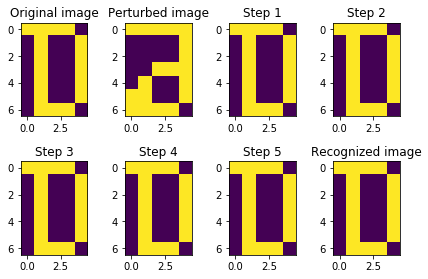

Equality: True
Recognized: True


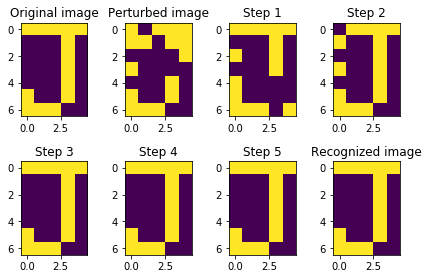

Equality: True
Recognized: True


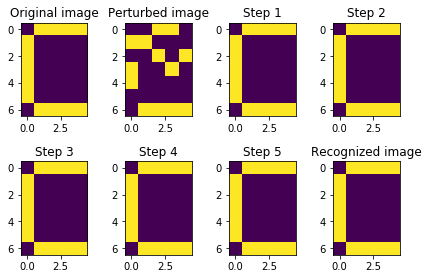

Equality: True
Recognized: True


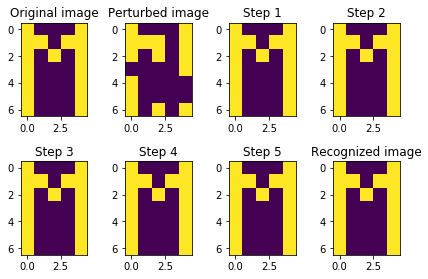

Equality: True
Recognized: True


In [22]:
run_perturbations(10)

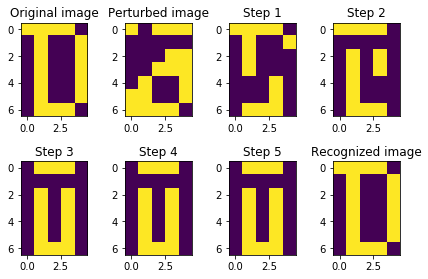

Equality: False
Recognized: True


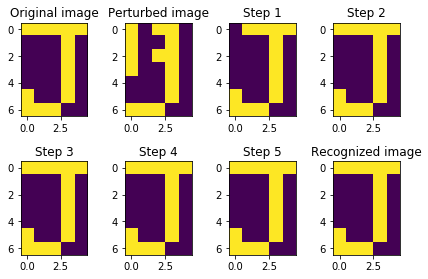

Equality: True
Recognized: True


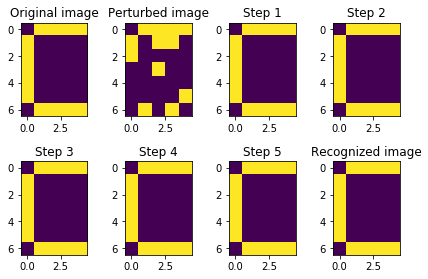

Equality: True
Recognized: True


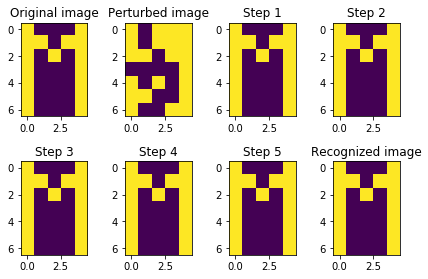

Equality: True
Recognized: True


In [23]:
run_perturbations(15)

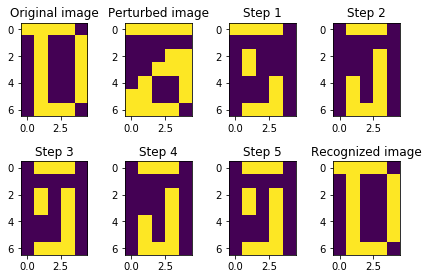

Equality: False
Recognized: True


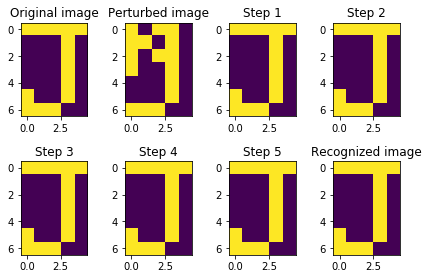

Equality: True
Recognized: True


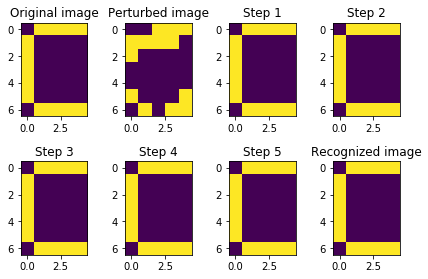

Equality: True
Recognized: True


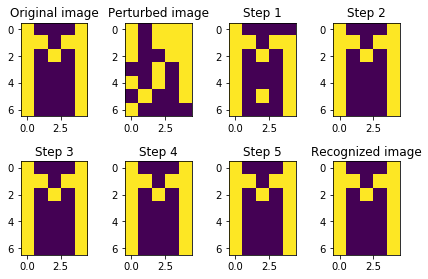

Equality: True
Recognized: True


In [24]:
run_perturbations(14)

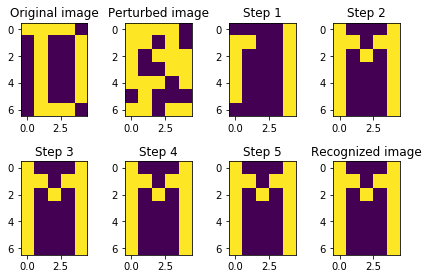

Equality: False
Recognized: False


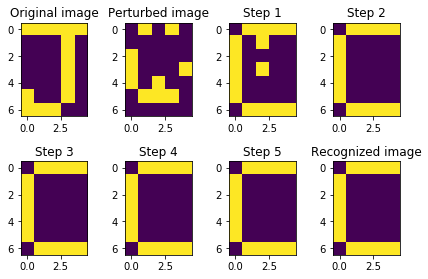

Equality: False
Recognized: False


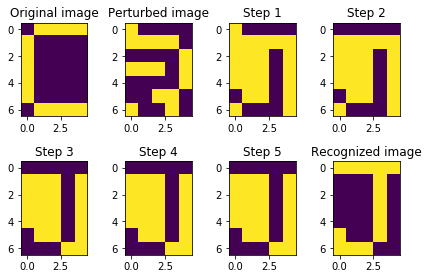

Equality: False
Recognized: False


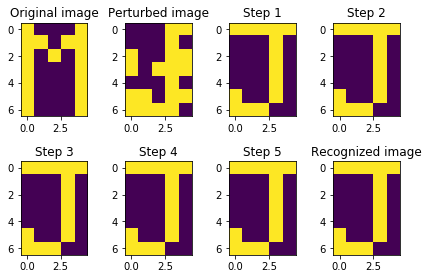

Equality: False
Recognized: False


In [25]:
run_perturbations(50)

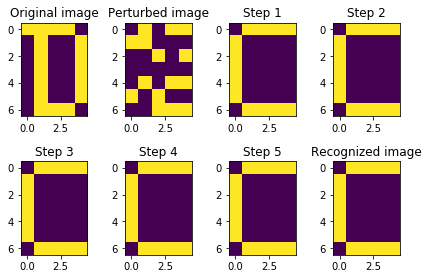

Equality: False
Recognized: False


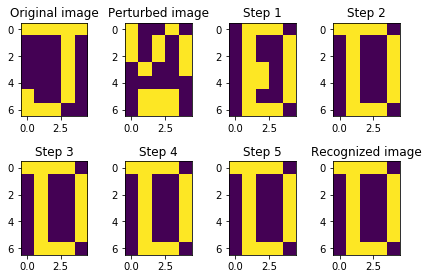

Equality: False
Recognized: False


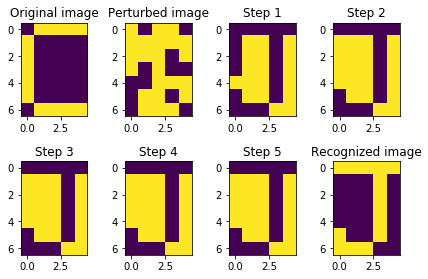

Equality: False
Recognized: False


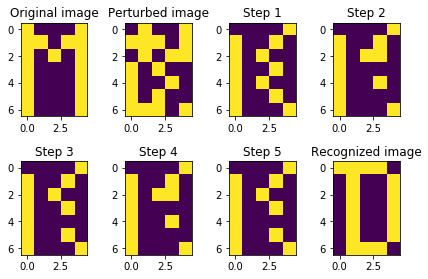

Equality: False
Recognized: False


In [26]:
run_perturbations(100)